# Cálculo de probabilidades


La función de probablidad P, asigna a cada evento una probabilidad de ocurrencia. P(evento), es la probabilidad de que el evento A, ocurra al efectuar un experimento. Por convencion la probablidad es un número entre 0 y 1 o entre 0 y el 100%. los eventos imposibles tiene una probablidad de 0. Los eventos que son ciertos tiene una probablidad de 1. 

Para el calculo de probabilidades P, se suele definir primero el espacio muestral, definido  como la colección de todos los resultados posibles de un experimentos, después, dependiendo de la naturaleza del experimento,  se toman los valores asignados de ocurrencia de cada unos de los eventos.

Un ejemplo, el espacio muestral del lanzamiento de una moneda que tiene una cara (H) y  un sello (T) es: $S=\{T, H\}$.

$P(S) = P(T) + P(H)  = 1 $

Si la moneda, no esta pesada es plausible asumir que :

$ P(H) + P(T)=\frac{1}{2}$




## ¿Cuando un evento no sucede?
Si la probabilidad de que ocurra un evento es del 40%, la probabilidad de que el evento NO ocurra es del 60%

$P (\text{evento NO ocurra}) = 1- P(\text{evento ocurra})$


Ejemplo: 

¿Cuál es la probabilidad de que por lo menos, una cara salga en dos tiradas de una moneda?

R/:,   
S = {TT , TH, HT, HH}

Si asumimos que cada evento ocurre bajo las mismas condiciones, la probabilidad viene dada por: 

$P(S) = \frac{ \{TH, HT, HH\} }{ \{TT , TH, HT, HH\} } = \frac{3}{4}$

Experimentos computacional

In [65]:
from datascience import *
import numpy as np
import matplotlib.pylab as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
S = make_array("T", "H")

In [7]:
def lanzamiento():
    return np.random.choice(S, 100)

In [10]:
Nsimulacion = make_array()
for i in range (0, 1000):
    Nsimulacion=np.append(Nsimulacion, lanzamiento())

In [15]:
np.count_nonzero(Nsimulacion=="T")

49783

In [16]:
np.count_nonzero(Nsimulacion=="H")

50217

In [18]:
E = Table().with_column("Simulacion", Nsimulacion)

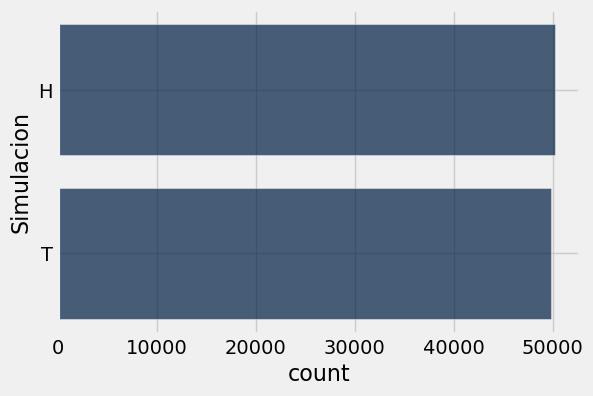

In [20]:
E.group("Simulacion").barh(0)

In [49]:
S = make_array("HH", "HT", "TH", "TT")

In [50]:
def doble_lanzamiento():
    return np.random.choice(S, 100)

¿Cuál es la probabilidad de obtener una cara?

In [57]:
def probablidad_obtener_una_cara():
    Nsim=make_array()
    for i in range(0, 1000):
        Nsim = np.append(Nsim, doble_lanzamiento())
    n = np.count_nonzero( (Nsim=="HH") | (Nsim=="HT") | (Nsim=="TH"))
    return n/len(Nsim)

In [61]:
valor_esperado=make_array()
for i in range(0, 100):
    print(i)
    valor_esperado=np.append(valor_esperado, probablidad_obtener_una_cara())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [67]:
v=Table().with_column("v", valor_esperado)


(0.74, 0.76)

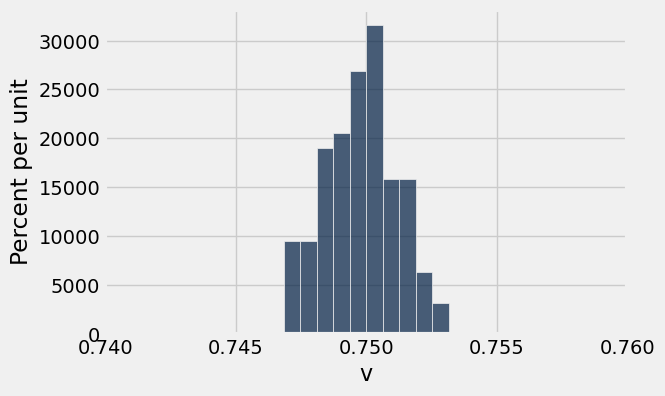

In [73]:
v.hist()
plots.xlim(0.74, 0.76)

In [2]:
def lanzamiento():
    S=make_array("H", "T")
    experimento=np.random.choice(S, 100)
    return experimento
resultados=make_array()
for i in range(0, 1000):
    a = lanzamiento()
    resultados=np.append(resultados, a)
    

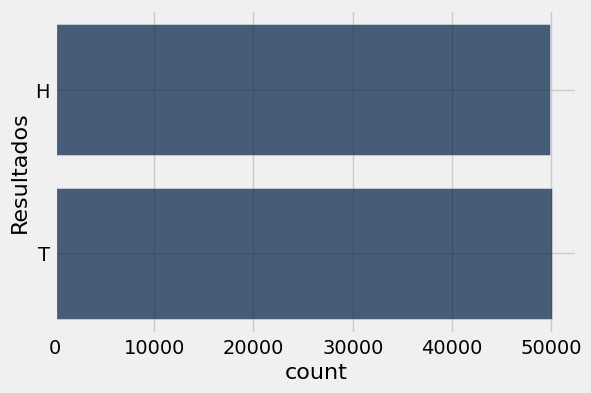

In [51]:
resultado = Table().with_columns("Resultados",resultados)
resultado.group("Resultados").barh(0)

# Lancemos la moneda dos veces

In [52]:
S = make_array("HH", "HT", "TH", "TT")
experimento = np.random.choice(S, 100)
resul = Table().with_columns("Resultados",experimento)
resul.group("Resultados")

Resultados,count
HH,27
HT,26
TH,18
TT,29


In [53]:
# Volvamos lo anterior una funcion 
def doble_lanzamiento():
    S = make_array("HH", "HT", "TH", "TT")
    experimento = np.random.choice(S, 100)
    return experimento


resultados = make_array()
for i in range(0, 100):
    resultados = np.append(resultados, doble_lanzamiento())

resultados = Table().with_column("resultados", resultados)
resultados.group("resultados")

resultados,count
HH,2570
HT,2496
TH,2491
TT,2443


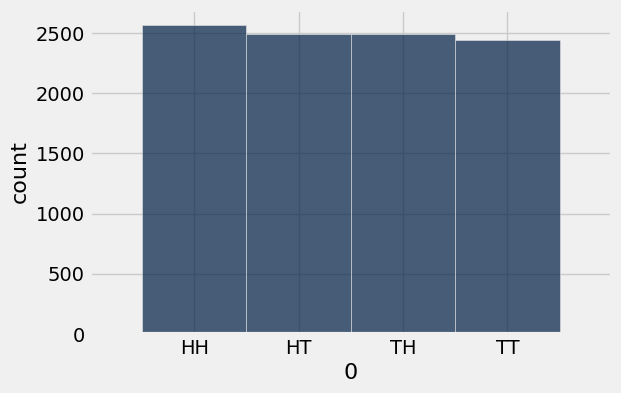

In [54]:
resultados.group("resultados").bar(0)

¿Cuál es la probablidad de que en la segunda tirada obtenga un cara?

# Problema. 

Supongamos que tenemos una bolsa con tres bolas: rojas, verde y azul, y realizas el siguiente experimento: Mezclas las bolas y sacas una. Después, vuelves a mezclar las bolas y sacas la segunda, y finalmente sacas la bola que queda. 

- ¿Cual es la probabilidad de sacar una bola verde primero seguida de una roja?

- ¿Cual es la probabilidad de que uno de las dos bolas sea verde y la otra roja?

Realiza el cálculo de forma teórica y comprueba tu solución con un experimento computacional.




In [75]:
S=make_array('RGB','RBG','BRG','BGR','GRB','GBR')
S

array(['RGB', 'RBG', 'BRG', 'BGR', 'GRB', 'GBR'],
      dtype='<U3')

In [87]:
def experimento_colores():
    return np.random.choice(S,100)

In [93]:
def Nexperimentos():
    resultado = make_array()
    for i in range(100):
        resultado = np.append(resultado,experimento_colores())
    
    experimento = Table().with_column('simulacion',resultado)
    favorable = experimento.where('simulacion',are.containing('GR'))
    return favorable.num_rows/experimento.num_rows

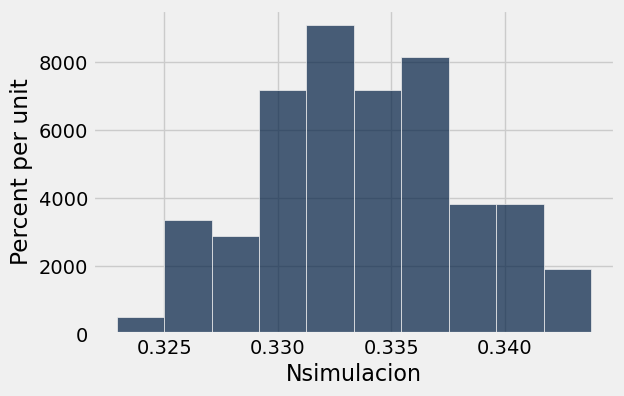

In [96]:
varios = make_array()
for j in range(100):
    varios = np.append(varios, Nexperimentos())

Table().with_column('Nsimulacion',varios).hist(0)

simulacion
GRB
GRB
GRB
BGR
GRB
BGR
GRB
GRB
GRB
GRB


0.3344

1/(6)**5

In [97]:
S=make_array("R", "G", "B")

In [98]:
Posibilidades = Table().with_column("S", S)

In [99]:
Posibilidades

S
R
G
B


In [103]:
Posibilidades.sample(10, with_replacement=True)

S
B
R
B
B
R
B
B
G
R
B


In [113]:
Posibilidades.sample(3, with_replacement=False)

S
R
G
B
